<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_17_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

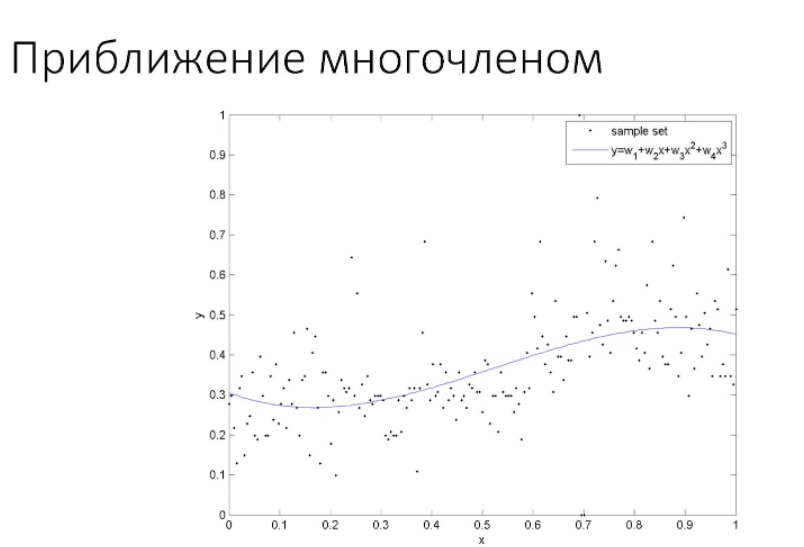

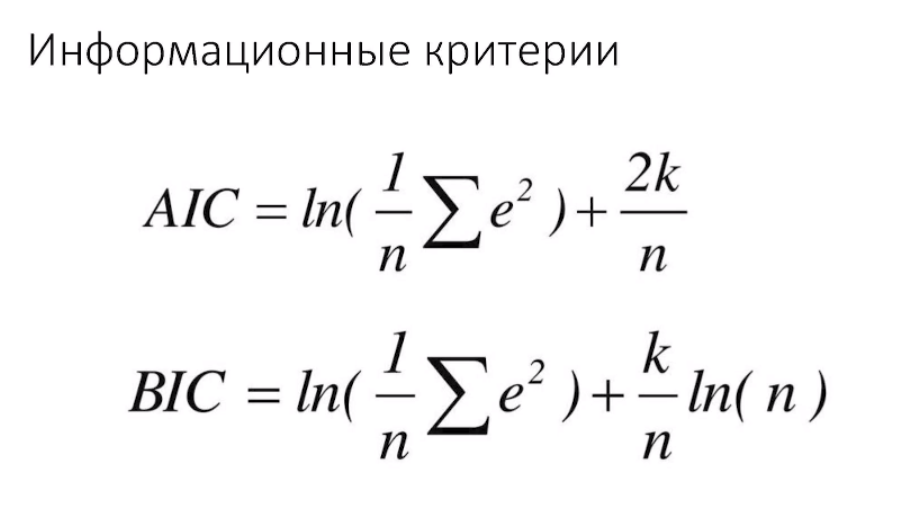

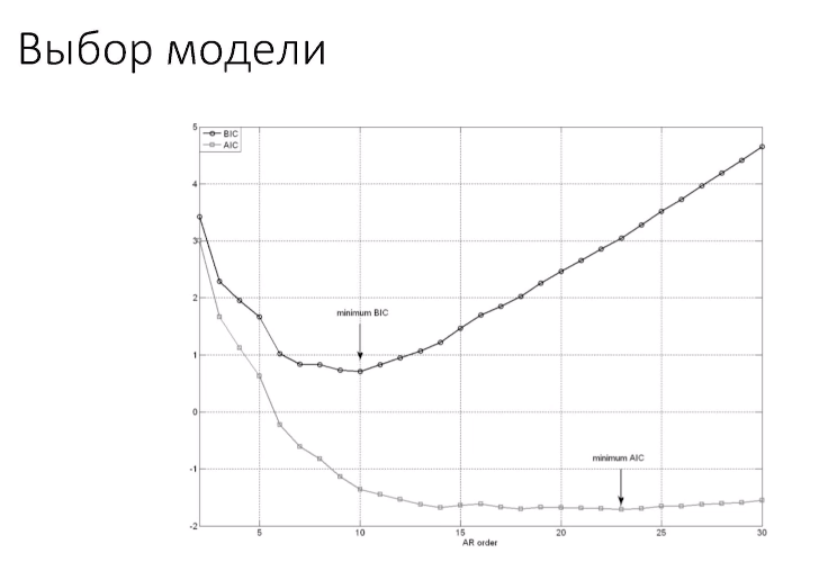

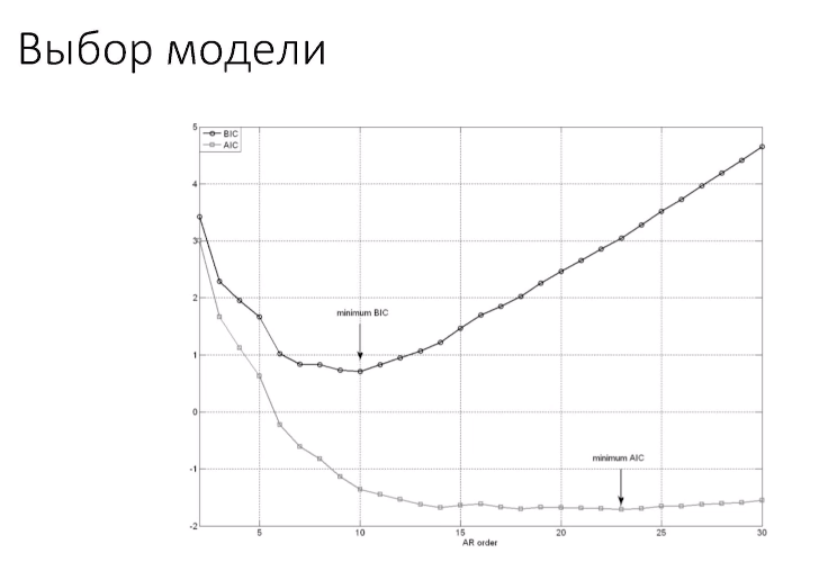

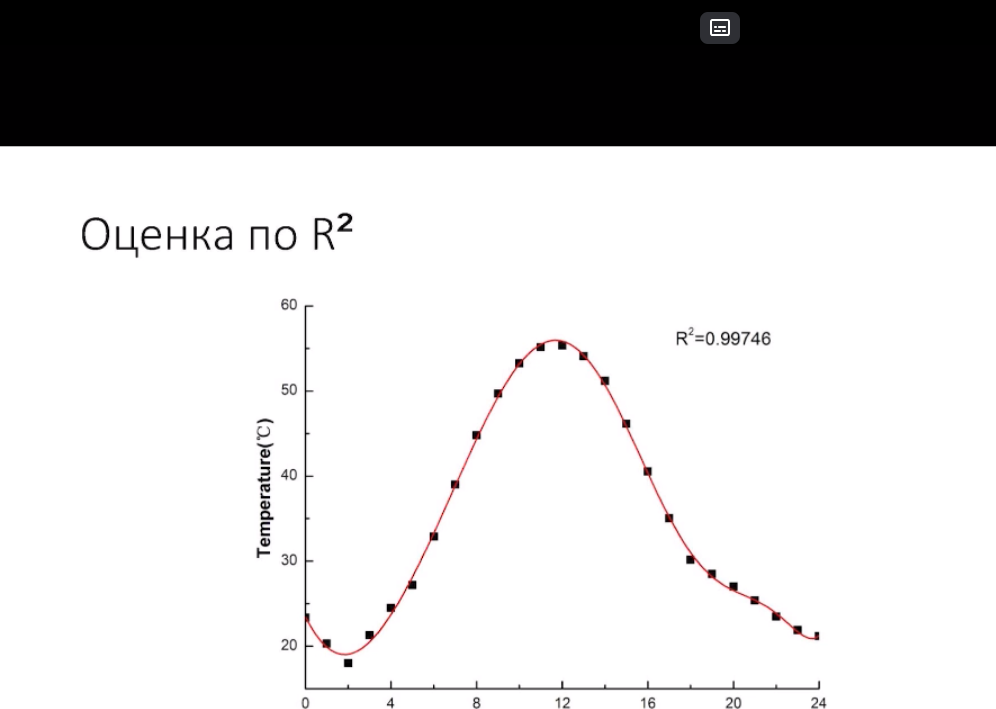

**практикум**

квдратичная регрессия
полиномиальная регрессия

In [3]:
import numpy as np
import pandas as pd

!pip install optuna
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,ElasticNet
from scipy.stats import uniform
from sklearn.metrics import mean_squared_log_error
import sklearn
from sklearn.model_selection import RandomizedSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.8 MB/s eta 0:00:00


In [30]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')

data.head()

,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,air_temperature1,wind_direction_sin,wind_direction_cos,hour
0,2016-01-30 08:00:00,43.6839,8.3,0.0,6.1,0.0,1019.0,2.1,-2.3,-0.642788,-0.766044,8
1,2016-01-31 05:00:00,37.5408,12.8,0.0,10.0,0.0,1021.9,0.0,-1.1,0.000000,1.000000,5
2,2016-01-31 17:00:00,52.5571,20.6,0.0,11.7,0.0,1020.9,1.5,1.7,0.939693,-0.342020,17
3,2016-04-08 14:00:00,59.3827,21.7,2.0,14.4,0.0,1015.1,3.1,2.8,-0.939693,-0.342020,14
4,2016-05-01 19:00:00,448.0000,31.1,0.0,17.2,0.0,1016.1,4.1,1.1,0.984808,-0.173648,19


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           5411 non-null   object 
 1   meter_reading       5411 non-null   float64
 2   air_temperature     5411 non-null   float64
 3   cloud_coverage      5411 non-null   float64
 4   dew_temperature     5411 non-null   float64
 5   precip_depth_1_hr   5411 non-null   float64
 6   sea_level_pressure  5383 non-null   float64
 7   wind_speed          5411 non-null   float64
 8   air_temperature1    5411 non-null   float64
 9   wind_direction_sin  5236 non-null   float64
 10  wind_direction_cos  5236 non-null   float64
 11  hour                5411 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 507.4+ KB


In [32]:
data = pd.DataFrame(data)
data["wind_direction_sin"] = data["wind_direction_sin"].interpolate()
data["sea_level_pressure"] = data["sea_level_pressure"].interpolate()
data["wind_direction_cos"] = data["wind_direction_cos"].interpolate()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           5411 non-null   object 
 1   meter_reading       5411 non-null   float64
 2   air_temperature     5411 non-null   float64
 3   cloud_coverage      5411 non-null   float64
 4   dew_temperature     5411 non-null   float64
 5   precip_depth_1_hr   5411 non-null   float64
 6   sea_level_pressure  5411 non-null   float64
 7   wind_speed          5411 non-null   float64
 8   air_temperature1    5411 non-null   float64
 9   wind_direction_sin  5411 non-null   float64
 10  wind_direction_cos  5411 non-null   float64
 11  hour                5411 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 507.4+ KB


In [33]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/energy_3.scv')


получение факторов второго порядка

In [ ]:
columns_iterate =  data.columns
columns = list(data.columns)
for column1 in columns_iterate:
  for column2 in columns_iterate:
    if (column1 not in ["timestamp", "meter_reading"] and
        column2 not in ["timestamp", "meter_reading"]):
        x = column1 + '_' + column2
        data[x] = np.multiply(data[column1], data[column2])
        columns.append(x)
columns.remove("timestamp")
columns.remove("meter_reading")

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-53-13a1bc3f6374>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[x] = np.multiply(data[column1], data[column2])
<ipython-input-53-13a1bc3f6374>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[x] = np.multiply(data[column1], data[column2])
<ipython-input-53-13a1bc3f6374>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

In [35]:
data[columns]

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,air_temperature1,wind_direction_sin,wind_direction_cos,hour,...,hour_air_temperature,hour_cloud_coverage,hour_dew_temperature,hour_precip_depth_1_hr,hour_sea_level_pressure,hour_wind_speed,hour_air_temperature1,hour_wind_direction_sin,hour_wind_direction_cos,hour_hour
0,8.3,0.0,6.1,0.0,1019.0,2.1,-2.3,-0.642788,-0.766044,8,...,66.4,0.0,48.8,0.0,8152.0,16.8,-18.4,-5.142301,-6.128356,64
1,12.8,0.0,10.0,0.0,1021.9,0.0,-1.1,0.000000,1.000000,5,...,64.0,0.0,50.0,0.0,5109.5,0.0,-5.5,0.000000,5.000000,25
2,20.6,0.0,11.7,0.0,1020.9,1.5,1.7,0.939693,-0.342020,17,...,350.2,0.0,198.9,0.0,17355.3,25.5,28.9,15.974775,-5.814342,289
3,21.7,2.0,14.4,0.0,1015.1,3.1,2.8,-0.939693,-0.342020,14,...,303.8,28.0,201.6,0.0,14211.4,43.4,39.2,-13.155697,-4.788282,196
4,31.1,0.0,17.2,0.0,1016.1,4.1,1.1,0.984808,-0.173648,19,...,590.9,0.0,326.8,0.0,19305.9,77.9,20.9,18.711347,-3.299315,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,22.8,0.0,10.0,0.0,1021.7,5.7,1.1,0.642788,-0.766044,19,...,433.2,0.0,190.0,0.0,19412.3,108.3,20.9,12.212965,-14.554844,361
5407,23.3,0.0,8.9,0.0,1021.0,4.1,0.5,0.173648,-0.984808,20,...,466.0,0.0,178.0,0.0,20420.0,82.0,10.0,3.472964,-19.696155,400
5408,23.3,0.0,10.0,0.0,1021.1,4.1,0.0,0.500000,-0.866025,21,...,489.3,0.0,210.0,0.0,21443.1,86.1,0.0,10.500000,-18.186533,441
5409,22.8,0.0,10.0,0.0,1021.1,3.1,-0.5,0.342020,-0.939693,22,...,501.6,0.0,220.0,0.0,22464.2,68.2,-11.0,7.524443,-20.673238,484


нормализация данных

In [38]:
data_norm = MinMaxScaler().fit_transform(data[columns])
#df = pd.DataFrame(data_norm)
#df.info()
#df[1] = df[1].interpolate()
#df[6] = df[6].interpolate()
#df[7] = df[7].interpolate()
#data_norm_1 = [x for x in data_norm if str(x) !='Nan']
data_norm

array([[0.10610932, 0.        , 0.44285714, ..., 0.38821085, 0.36677488,
        0.12098299],
       [0.25080386, 0.        , 0.55428571, ..., 0.5       , 0.60869565,
        0.04725898],
       [0.50160772, 0.        , 0.60285714, ..., 0.84727771, 0.37360125,
        0.5463138 ],
       ...,
       [0.58842444, 0.        , 0.55428571, ..., 0.72826087, 0.10464058,
        0.83364839],
       [0.57234727, 0.        , 0.55428571, ..., 0.66357485, 0.05058179,
        0.91493384],
       [0.50160772, 0.        , 0.55428571, ..., 0.5       , 1.        ,
        1.        ]])

**модель линейной регрессии**

In [39]:
# функция ошибки RMSLE
def rmsle_err(y, y_pred):
  return ((np.log(1 + y) - np.log(1 + y_pred))**2).mean()**0.5


In [40]:
x = data_norm
y = data['meter_reading']
model = LinearRegression().fit(x, y)
print ('RMSLE: {0:.5}'. format(rmsle_err(y, model.predict(x))))

RMSLE: 0.18607


вобще хорошо

In [15]:
def objective(trial):
  alpha = trial.suggest_float('alpha', 1e-8, 1, log=True)
  l1_ratio = trial.suggest_float('l1_ratio', 1e-3, 1, log=True)
  regressor_obj = ElasticNet(alpha = alpha, l1_ratio=l1_ratio, max_iter=10000)
  regressor_obj.fit(x,y)
  y_pred = regressor_obj.predict(x)
  return mean_squared_log_error(y,y_pred)

In [16]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2024-01-17 16:11:10,803] A new study created in memory with name: no-name-b3e127d7-c1d9-4e1c-966b-9f57c8798e61
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.260e+04, tolerance: 4.932e+01
  model = cd_fast.enet_coordinate_descent(
[I 2024-01-17 16:11:15,189] Trial 0 finished with value: 0.009384591210317508 and parameters: {'alpha': 2.5956259376500323e-05, 'l1_ratio': 0.9212026465100565}. Best is trial 0 with value: 0.009384591210317508.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.805e+04, tolerance: 4.932e+01
  model = cd_fast.en

In [17]:
print(study.best_params)

{'alpha': 1.0038592151064675e-08, 'l1_ratio': 0.9862932755231381}


In [41]:
model_optuna = ElasticNet(alpha=study.best_params['alpha'], l1_ratio=study.best_params['l1_ratio'],max_iter=100000).fit(x, y)
print ('RMSLE: {0:.5}'. format(rmsle_err(y, model_optuna.predict(x))))

RMSLE: 0.18905


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.386e+06, tolerance: 1.306e+03
  model = cd_fast.enet_coordinate_descent(


**Практикум  для самостоятельной работы**                                                           

1.Дайте определение полиномиальной регрессии.

Выражаясь простым языком, модель регрессии в математической статистике строится на основе известных данных, в роли которых выступают пары чисел. Количество таких пар заранее определено. Если представить себе, что первое число в паре – это значение координаты $x$, а второе – $y$, то множество таких пар чисел можно представить на плоскости в декартовой системе координат в виде множества точек. Данные пары чисел берутся не случайно. На практике, как правило, второе число зависит от первого. Построить регрессию – это значит подобрать такую линию (точнее, функцию), которая как можно точнее приближает к себе (аппроксимирует) множество вышесказанных точек.
Полиномиальной регрессией является одна из форм регрессионного анализа , в которой зависимость между независимой переменной х и зависимой переменной у моделируется как п - й степени многочлена в х . Полиномиальная регрессия находит нелинейную зависимость между величиной х и соответствующим условным средним от у , обозначаются Е ( у  | х ).

2.Назовите отличительные особенности полиномиальной регрессии.

Моделирует нелинейно разделенные данные (чего не может линейная регрессия). Она более гибкая и может моделировать сложные взаимосвязи. Полный контроль над моделированием переменных объекта (выбор степени). Необходимо внимательно создавать модель. Необходимо обладать некоторыми знаниями о данных, для выбора наиболее подходящей степени. При неправильном выборе степени, данная модель может быть перенасыщена.

Полиномиальная регрессия может применяться в математической статистике при моделировании трендовых составляющих временных рядов. Временной ряд — это, по сути, ряд чисел, которые зависят от времени. Например, средние значения температуры воздуха по дням за прошедший год, или доход предприятия по месяцам. Порядок моделируемого полинома оценивается специальными методами, например, критерием серий. Цель построения модели полиномиальной регрессии в области временных рядов всё та же – прогнозирование.

3.пример из лекции (СМ.выше)